>
> # MaaSSim tutorial

 ### quickstart

In [1]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging

In [3]:
import pandas as pd

In [4]:
import ExMAS

In [5]:
params = get_config('../../data/config/delft.json')  # load configuration

In [6]:
params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 1 hour of simulation
params.nP = 50 # reuqests (and passengers)
params.nV = 1 # vehicles

In [7]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.3
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_pax' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True

In [8]:
inData = load_G(inData, params)  # load network graph 

In [9]:
inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True

In [10]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

12-01-23 13:21:18-INFO-Initializing pairwise trip shareability between 50 and 50 trips.
12-01-23 13:21:18-INFO-creating combinations
12-01-23 13:21:18-INFO-2450	 nR*(nR-1)
12-01-23 13:21:18-INFO-Reduction of feasible pairs by 98.90%
12-01-23 13:21:18-INFO-Degree 2 	Completed
12-01-23 13:21:18-INFO-trips to extend at degree 2 : 76
12-01-23 13:21:18-INFO-At degree 2 feasible extensions found out of 6 searched
12-01-23 13:21:18-INFO-Degree 3 	Completed
12-01-23 13:21:18-INFO-trips to extend at degree 3 : 6
12-01-23 13:21:18-INFO-At degree 3 feasible extensions found out of 0 searched
12-01-23 13:21:18-INFO-Degree 4 	Completed
12-01-23 13:21:18-INFO-Max degree reached 4
12-01-23 13:21:18-INFO-Trips still possible to extend at degree 4 : 0


In [13]:
inData = prep_shared_rides(inData, params.shareability)  # prepare schedules

12-01-23 13:21:47-INFO-Matching 50 trips to 132 rides in order to min u_pax
12-01-23 13:21:47-INFO-Problem solution: Optimal. 
Total costs for single trips:            266 
reduced by matching to:                  244


TypeError: unsupported operand type(s) for *: 'float' and 'DotMap'

In [14]:
inData.sblts.rides.loc[inData.requests.loc[3].rides]

indexes     u_pax u_veh kind                                  u_paxes  \
3        [3]   9.49650   513    1                                 [9.4965]   
51    [1, 3]  16.63865   799   20              [7.9674, 8.671249999999999]   
55    [3, 1]  17.46675   817   20                        [8.4847, 8.98205]   
56    [3, 7]  15.03705   993   20            [9.001124999999998, 6.035925]   
57    [3, 8]  13.17015   876   20                     [8.969275, 4.200875]   
58   [3, 11]  16.71495  1064   20   [9.221799999999998, 7.493149999999999]   
99    [1, 3]  16.76605   812   21             [9.0139, 7.7521499999999985]   
102   [3, 1]  17.34845   805   21   [9.408349999999999, 7.940099999999999]   
103   [3, 5]  10.89725   702   21           [8.928325, 1.9689249999999996]   
104  [3, 13]  13.35705   680   21  [9.126249999999999, 4.2307999999999995]   

                      times indexes_orig indexes_dest  degree  index  \
3                [188, 513]          [3]          [3]       1      3   
51    [110.0, 84, 498, 217]       [1, 3]       [1, 3]       2     51   
55    [110.0, 84, 518, 215]       [3, 1]       [3, 1]       2     55   
56    [95.5, 571, 130, 292]       [3, 7]       [3, 7]       2     56   
57   [105.5, 572, 132, 172]       [3, 8]       [3, 8]       2     57   
58   [241.0, 405, 384, 275]      [3, 11]      [3, 11]       2     58   
99    [110.0, 84, 513, 215]       [1, 3]       [3, 1]       2     99   
102   [110.0, 84, 504, 217]       [3, 1]       [1, 3]       2    102   
103  [112.5, 311, 108, 283]       [3, 5]       [5, 3]       2    103   
104  [329.0, 295, 238, 147]      [3, 13]      [13, 3]       2    104   

     PassHourTrav_ns                                                row  \
3                513  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
51              1017  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
55              1017  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
56               864  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
57               745  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
58               918  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
99              1017  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
102             1017  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
103              621  [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   
104              751  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

     selected                                              nodes  \
3           0                       [None, 44883814, 1608998299]   
51          1   [None, 44906763, 44883814, 44738227, 1608998299]   
55          0   [None, 44883814, 44906763, 1608998299, 44738227]   
56          0  [None, 44883814, 1448535781, 1608998299, 14353...   
57          0  [None, 44883814, 1448535783, 1608998299, 14139...   
58          0  [None, 44883814, 130116959, 1608998299, 44814384]   
99          0   [None, 44906763, 44883814, 1608998299, 44738227]   
102         0   [None, 44883814, 44906763, 44738227, 1608998299]   
103         0  [None, 44883814, 4159110115, 44829650, 1608998...   
104         0   [None, 44883814, 44814930, 44783329, 1608998299]   

                   req_id                                       sim_schedule  \
3            [None, 3, 3]             node time  req_id    od
0          ...   
51     [None, 1, 3, 1, 3]             node time  req_id    od
0          ...   
55     [None, 3, 1, 3, 1]             node time  req_id    od
0          ...   
56     [None, 3, 7, 3, 7]             node time  req_id    od
0          ...   
57     [None, 3, 8, 3, 8]             node time  req_id    od
0          ...   
58   [None, 3, 11, 3, 11]             node time  req_id    od
0          ...   
99     [None, 1, 3, 3, 1]             node time  req_id    od
0          ...   
102    [None, 3, 1, 1, 3]             node time  req_id    od
0          ...   
103    [None, 3, 5, 5, 3]             node time  req_id   

In [15]:
inData.requests

pax_id      origin  destination                treq tdep           ttrav  \
0        0  1516978145     44767106 2023-01-12 12:53:28  NaN 0 days 00:47:11   
1        1    44906763     44738227 2023-01-12 12:55:24  NaN 0 days 01:24:00   
2        2    44772101   4937365113 2023-01-12 12:56:14  NaN 0 days 00:38:10   
3        3    44883814   1608998299 2023-01-12 12:56:36  NaN 0 days 01:25:34   
4        4    44821045     44821573 2023-01-12 12:59:04  NaN 0 days 01:02:32   
5        5  4159110115     44829650 2023-01-12 12:59:16  NaN 0 days 00:18:00   
6        6    44712990   1563023404 2023-01-12 13:00:39  NaN 0 days 00:39:51   
7        7  1448535781   1435362376 2023-01-12 13:03:02  NaN 0 days 00:58:39   
8        8  1448535783   1413910851 2023-01-12 13:03:23  NaN 0 days 00:38:46   
9        9    44769963     44836973 2023-01-12 13:04:16  NaN 0 days 00:46:36   
10      10    44830594   1576641163 2023-01-12 13:04:51  NaN 0 days 01:05:17   
11      11   130116959     44814384 2023-01-12 13:05:07  NaN 0 days 01:07:31   
12      12    44847008   3452720268 2023-01-12 13:05:35  NaN 0 days 00:20:36   
13      13    44814930     44783329 2023-01-12 13:06:13  NaN 0 days 00:39:47   
14      14  1460714944   1576745682 2023-01-12 13:06:13  NaN 0 days 00:39:28   
15      15  4955735207     44834664 2023-01-12 13:11:10  NaN 0 days 00:54:19   
16      16    44778405   4555788280 2023-01-12 13:13:13  NaN 0 days 00:21:52   
17      17  1552650460   4801236440 2023-01-12 13:13:40  NaN 0 days 00:42:49   
18      18  1510592123    527060635 2023-01-12 13:14:46  NaN 0 days 00:49:03   
19      19  1413910857     44798266 2023-01-12 13:15:56  NaN 0 days 00:14:13   
20      20    44864976     44835264 2023-01-12 13:16:16  NaN 0 days 00:29:38   
21      21  1410537007   3201816976 2023-01-12 13:16:17  NaN 0 days 00:46:45   
22      22  1402771499    643586572 2023-01-12 13:20:26  NaN 0 days 00:34:48   
23      23  1846605950   1569975218 2023-01-12 13:24:17  NaN 0 days 01:09:53   
24      24  4474343338   1391531564 2023-01-12 13:25:06  NaN 0 days 00:38:27   
25      25  4474353184   1448535742 2023-01-12 13:26:30  NaN 0 days 00:34:42   
26      26  1830058787   5714816833 2023-01-12 13:26:52  NaN 0 days 00:50:01   
27      27  4486831035   1413911044 2023-01-12 13:29:33  NaN 0 days 00:40:29   
28      28    44731083     44758563 2023-01-12 13:32:33  NaN 0 days 00:53:10   
29      29  1840078410    626010019 2023-01-12 13:33:00  NaN 0 days 00:26:26   
30      30  1552650889     44899984 2023-01-12 13:35:44  NaN 0 days 01:01:02   
31      31  1608998260   1435362415 2023-01-12 13:36:57  NaN 0 days 01:11:31   
32      32  1530303600   3201816976 2023-01-12 13:37:23  NaN 0 days 00:54:13   
33      33   359175432   5159209866 2023-01-12 13:38:10  NaN 0 days 01:22:25   
34      34  1570983068     44714412 2023-01-12 13:38:57  NaN 0 days 00:10:03   
35      35    44843606   1570983366 2023-01-12 13:39:07  NaN 0 days 01:22:52   
36      36  1413910863     44832709 2023-01-12 13:39:29  NaN 0 days 00:23:29   
37      37  1608998334   1571088109 2023-01-12 13:40:47  NaN 0 days 00:26:26   
38      38  1448535920   1448535743 2023-01-12 13:41:20  NaN 0 days 00:53:52   
39      39  1435362515     44822486 2023-01-12 13:41:47  NaN 0 days 00:19:09   
40      40  1569647863   1391531584 2023-01-12 13:44:41  NaN 0 days 01:19:25   
41      41    44824645     44721485 2023-01-12 13:44:49  NaN 0 days 01:18:29   
42      42    44852763   3669138201 2023-01-12 13:45:20  NaN 0 days 00:49:59   
43      43  2365613951   2598004622 2023-01-12 13:45:39  NaN 0 days 00:56:15   
44      44  1830076498     44821566 2023-01-12 13:47:36  NaN 0 days 01:07:25   
45      45   610474647   2367860700 2023-01-12 13:48:12  NaN 0 days 00:43:06   
46      46  1391531638     44815349 2023-01-12 13:48:55  NaN 0 days 00:28:15   
47      47  4810005054   1258470923 2023-01-12 13:49:07  NaN 0 days 00:50:57   
48      48  1413911096   1571088417 2023-01-12 13:49:24  NaN 0 days 00:47:47   
49  

simulate

In [11]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

14-11-22 15:36:53-INFO-Matching 500 trips to 3193 rides in order to minimize u_pax
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/envs/ExMAS/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/57cb6b823d944878a22dad4de4669521-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/11/v91c3qb92lg10fbgz1ptll4m0000gn/T/57cb6b823d944878a22dad4de4669521-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 505 COLUMNS
At line 16642 RHS
At line 17143 BOUNDS
At line 20337 ENDATA
Problem MODEL has 500 rows, 3193 columns and 6558 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 2150.76 - 0.01 seconds
Cgl0004I processed model has 457 rows, 2541 columns (2541 integer (2541 of which binary)) and 5059 elements
Cbc0038I Initial state - 44 integers unsatisfied su

<AxesSubplot:>

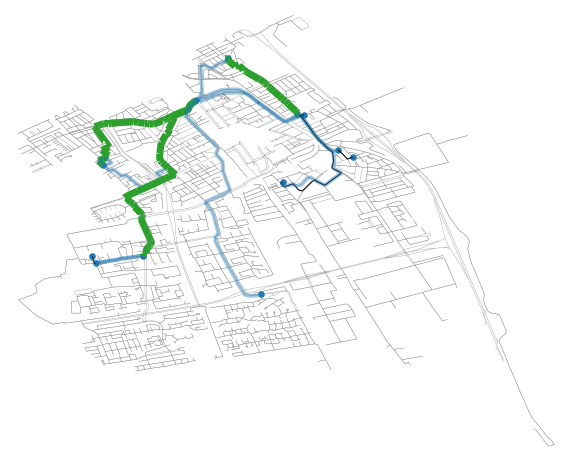

In [48]:
df = sim.runs[0].rides

for i in range(params.nV):
    paxes = df[df.veh==i].paxes
    if paxes.apply(lambda x: len(x)).max()>1:
        break
plot_veh(inData.G, df[df.veh ==19], lw = 1)

In [27]:
params.shareability.share = 0
sim2 = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

14-10-20 11:57:39-WARNING-Setting up 4h simulation at 2020-10-14 09:50:36 for 100 vehicles and 500 passengers in Delft, Netherlands
14-10-20 11:57:57-WARNING-simulation time 17.5 s
14-10-20 11:57:58-WARNING-assertion tests for simulation results - passed


<AxesSubplot:>

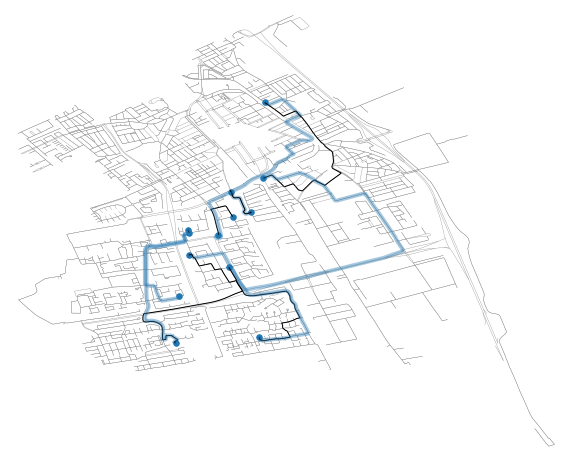

In [47]:
df = sim2.runs[0].rides

for i in range(params.nV):
    paxes = df[df.veh==i].paxes
    if paxes.apply(lambda x: len(x)).max()==1:
        break
plot_veh(inData.G, df[df.veh ==8], lw = 1)

-----